In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
import nltk
import re
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")
import nltk
nltk.download("punkt_tab")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()


In [ ]:
df = pd.read_csv("it_domain_questions.csv")
df.head()


,question,domain
0,Explain the purpose of feature scaling in mach...,Data Science
1,What is the difference between supervised and ...,Data Science
2,How is overfitting detected in a model? (examp...,Data Science
3,Explain the purpose of feature scaling in mach...,Data Science
4,What are the common evaluation metrics for cla...,Data Science


In [ ]:
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  1200 non-null   object
 1   domain    1200 non-null   object
dtypes: object(2)
memory usage: 18.9+ KB


,0
question,0
domain,0


In [ ]:
def preprocess_text(text):
    # 1. Mise en minuscules
    text = text.lower()

    # 2. Suppression des URLs
    text = re.sub(r"http\S+|www\S+", "", text)

    # 3. Suppression de la ponctuation et chiffres
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\d+", "", text)

    # 4. Tokenisation
    tokens = word_tokenize(text)

    # 5. Suppression des stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 6. Lemmatisation
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 7. Reconstruction du texte
    return " ".join(tokens)


In [ ]:
df["clean_question"] = df["question"].apply(preprocess_text)

df[["question", "clean_question"]].head()


,question,clean_question
0,Explain the purpose of feature scaling in mach...,explain purpose feature scaling machine learni...
1,What is the difference between supervised and ...,difference supervised unsupervised learning ex...
2,How is overfitting detected in a model? (examp...,overfitting detected model example
3,Explain the purpose of feature scaling in mach...,explain purpose feature scaling machine learni...
4,What are the common evaluation metrics for cla...,common evaluation metric classification example


In [ ]:
X = df["clean_question"]
y = df["domain"]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
pipeline_lr = Pipeline([
    ("tfidf", TfidfVectorizer(
        lowercase=True,
        stop_words="english",
        ngram_range=(1, 2),
        min_df=2,
        max_df=0.9,
        max_features=5000
    )),
    ("clf", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        n_jobs=-1
    ))
])

pipeline_lr.fit(X_train, y_train)

y_pred_lr = pipeline_lr.predict(X_test)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

pipeline_svm = Pipeline([
    ("tfidf", TfidfVectorizer(
        ngram_range=(1, 2),
        min_df=2,
        max_df=0.9,
        max_features=5000
    )),
    ("clf", LinearSVC(
        class_weight="balanced",
        max_iter=5000
    ))
])

pipeline_svm.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, max_features=5000, min_df=2,
                                 ngram_range=(1, 2))),
                ('clf', LinearSVC(class_weight='balanced', max_iter=5000))])

In [ ]:
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


=== Logistic Regression ===
Accuracy: 1.0
                 precision    recall  f1-score   support

Cloud Computing       1.00      1.00      1.00        48
  Cybersecurity       1.00      1.00      1.00        48
   Data Science       1.00      1.00      1.00        48
         DevOps       1.00      1.00      1.00        48
Web Development       1.00      1.00      1.00        48

       accuracy                           1.00       240
      macro avg       1.00      1.00      1.00       240
   weighted avg       1.00      1.00      1.00       240



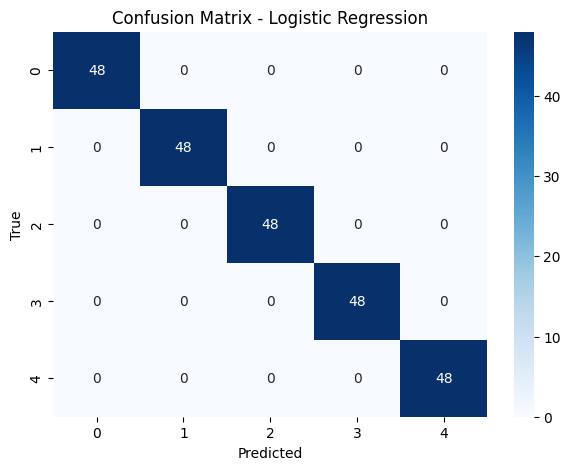

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(7,5))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
print("=== Linear SVM ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


=== Linear SVM ===
Accuracy: 1.0
                 precision    recall  f1-score   support

Cloud Computing       1.00      1.00      1.00        48
  Cybersecurity       1.00      1.00      1.00        48
   Data Science       1.00      1.00      1.00        48
         DevOps       1.00      1.00      1.00        48
Web Development       1.00      1.00      1.00        48

       accuracy                           1.00       240
      macro avg       1.00      1.00      1.00       240
   weighted avg       1.00      1.00      1.00       240



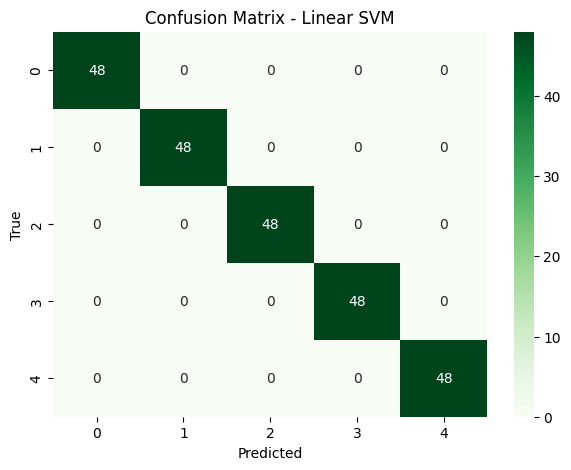

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(7,5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Linear SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Linear SVM"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_svm)
    ]
})

results


,Model,Accuracy
0,Logistic Regression,1.0
1,Linear SVM,1.0


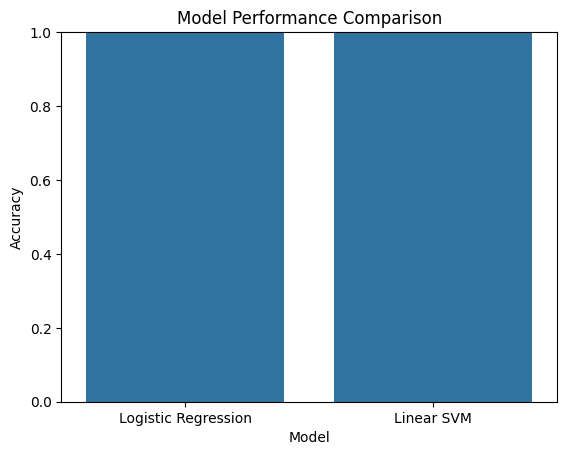

In [ ]:
sns.barplot(data=results, x="Model", y="Accuracy")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.show()


In [ ]:
def predict_domain(question, model):
    prediction = model.predict([question])[0]
    return prediction


In [ ]:
test_question_1 = "How to optimize SQL queries for large databases?"

print("Question:", test_question_1)
print("Predicted domain:", predict_domain(test_question_1, pipeline_svm))


Question: How to optimize SQL queries for large databases?
Predicted domain: Cybersecurity


In [ ]:
test_question_2 = "What is the difference between supervised and unsupervised learning?"

print("Question:", test_question_2)
print("Predicted domain:", predict_domain(test_question_2, pipeline_svm))


Question: What is the difference between supervised and unsupervised learning?
Predicted domain: Data Science


In [ ]:
user_question = input("Enter your IT question: ")
print("Predicted domain:", predict_domain(user_question, pipeline_svm))


KeyboardInterrupt: Interrupted by user